# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ardian Bahri Putra
- **Email:** ardianbahri20@gmail.com
- **ID Dicoding:** ardianbahri40

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap permintaan penyewaan sepeda?
- Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah?
- Apakah terdapat tren tahunan dalam penyewaan sepeda antara tahun 2011 dan 2012?


## Import Semua Packages/Library yang Digunakan

Sebelum memulai proyek, pastikan semua library yang diperlukan telah diimpor untuk mendukung proses pengerjaan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada tahap ini, dilakukan pengumpulan data yang telah tersedia. Mengingat penggunaan **Bike Sharing Dataset**, maka file **day.csv** dan **hr.csv** diimpor untuk analisis lebih lanjut.

#### Load tabel day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


#### Load tabel hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:** 

**1. Tren Penggunaan Sepeda**  
- Pada hari kerja (workingday = 1), jumlah penyewa terdaftar (registered) jauh lebih tinggi dibanding penyewa kasual (casual). Ini menunjukkan bahwa banyak pengguna tetap yang menggunakan layanan ini untuk keperluan rutin, seperti perjalanan ke kantor atau sekolah.  
- Pada akhir pekan dan hari libur (holiday = 1 atau workingday = 0), jumlah pengguna kasual meningkat, menunjukkan pola penggunaan rekreasional.

**2. Pengaruh Cuaca**  
- Cuaca yang lebih buruk (weathersit = 2 atau lebih tinggi) cenderung menurunkan jumlah pengguna. 
- Pada kondisi cuaca sedang atau cerah (weathersit = 1), jumlah penyewaan lebih tinggi.

**3. Dampak Suhu dan Kelembaban**  
- Suhu (temp) yang lebih nyaman berkorelasi dengan peningkatan jumlah penyewaan.
- Kelembaban tinggi (hum) cenderung menurunkan jumlah penyewaan, terutama pada hari kerja.

**4. Polanya Berdasarkan Jam**  
- Jumlah penyewa cenderung lebih tinggi pada jam sibuk (morning rush hours sekitar 7-9 AM dan evening rush hours sekitar 5-7 PM), mengindikasikan penggunaan sepeda sebagai moda transportasi utama bagi para pekerja dan mahasiswa.
- Malam hari dan dini hari memiliki jumlah penyewa yang rendah, yang bisa dikaitkan dengan kurangnya mobilitas masyarakat pada jam-jam tersebut. 

**5. Pengaruh Musim (season)**  
- Dataset ini mencakup musim yang berbeda, dan kemungkinan ada pola musiman dalam jumlah penyewaan. Misalnya, penyewaan mungkin lebih tinggi di musim semi atau panas dibanding musim dingin.

### Assessing Data

In [4]:
# Menampilkan informasi struktur dataset day_df
print("Info dataset day_df:")
print(day_df.info())

Info dataset day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [5]:
# Menampilkan informasi struktur dataset hour_df
print("\nInfo dataset hour_df:")
print(hour_df.info())


Info dataset hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [6]:
# Mengecek apakah ada missing values dari day_df
print("\nJumlah missing values pada dataset day_df:")
print(day_df.isnull().sum())


Jumlah missing values pada dataset day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Mengecek apakah ada missing values dari hour_df
print("\nJumlah missing values pada dataset hour_df:")
print(hour_df.isnull().sum())


Jumlah missing values pada dataset hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Mengecek apakah ada duplicate data dari day_df dan hour_df
print("\nJumlah duplikat data pada dataset day_df:", day_df.duplicated().sum())
print("Jumlah duplikat data pada dataset hour_df:", hour_df.duplicated().sum())


Jumlah duplikat data pada dataset day_df: 0
Jumlah duplikat data pada dataset hour_df: 0


In [9]:
# Menampilkan ringkasan statistik deskriptif untuk dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Menampilkan ringkasan statistik deskriptif untuk dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:** 

**1. Konsistensi Data**  
- Tidak ada missing values atau duplikasi data, yang berarti dataset ini cukup bersih dan siap untuk analisis lebih lanjut.
- Data memiliki jumlah entri yang cukup besar (731 hari dan 17.379 jam), memungkinkan analisis tren jangka panjang dan harian.

**2. Distribusi Musim dan Bulan**  
- Musim tersebar merata dengan rata-rata sekitar 2,5 (mewakili skala dari 1 hingga 4). Ini menunjukkan data mencakup semua musim secara proporsional.
- Distribusi bulan (mnth) menunjukkan bahwa semua bulan ada dalam dataset dengan nilai min 1 dan max 12.

**3. Pola Penggunaan Sepeda**  
- Jumlah penyewaan sepeda (cnt) harian memiliki rentang antara **22 hingga 8.714**, dengan rata-rata sekitar **4.504**.
- Dalam data per jam, jumlah penyewaan maksimum adalah 977, menunjukkan adanya jam-jam tertentu dengan permintaan tinggi.
- **Jumlah pengguna terdaftar (registered) jauh lebih tinggi dibandingkan pengguna kasual (casual)**, baik dalam data harian maupun jam.
  - Rata-rata harian: **Registered** = **3.656** vs. **Casual** = **848**.
  - Rata-rata per jam: **Registered** = **153** vs. **Casual** = **35**.
  - Ini mengindikasikan bahwa kebanyakan pengguna adalah pelanggan tetap yang sudah terdaftar, bukan pengguna musiman atau wisatawan.

**4. Pengaruh Faktor Eksternal**  
- **Hari kerja vs. Hari libur**
  - Mayoritas data berasal dari **hari kerja (workingday = 0,68)** dibanding hari libur.
  - Hari libur memiliki lebih sedikit penyewaan sepeda, kemungkinan karena mayoritas pengguna adalah pekerja atau mahasiswa yang menggunakan sepeda untuk komuter.
- **Cuaca (weathersit)**
  - Skor cuaca berkisar antara 1 hingga 3 (tidak ada cuaca ekstrem dengan nilai 4).
  - Penyewaan sepeda kemungkinan lebih tinggi pada cuaca yang baik (weathersit = 1).
- **Kondisi lingkungan**
  - **Temperatur rata-rata (temp) sekitar 0,49** (nilai antara 0-1).
  - **Kelembaban (hum) sekitar 0,62** dan **kecepatan angin (windspeed) sekitar 0,19**.
  - Rentang kecepatan angin cukup kecil, menunjukkan bahwa angin mungkin bukan faktor besar yang mempengaruhi penyewaan sepeda.

**5. Pola Harian dan Jam**  
- Dalam hour_df, penyewaan tertinggi ada di jam-jam tertentu, kemungkinan pagi (07:00 - 09:00) dan sore (17:00 - 19:00), mencerminkan pola komuter.
- Penyewaan lebih rendah di tengah malam dan dini hari, seperti yang ditunjukkan oleh jumlah penyewaan minimum = 1.

### Cleaning Data

In [11]:
# konversi kolom dteday menjadi tipe data datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [12]:
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [13]:
day_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
# Mengubah angka menjadi keterangan
day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})

day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
hour_df['weather_situation'] = hour_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** 

**1. Peningkatan Readability Data**  
- Konversi dteday menjadi tipe datetime memungkinkan analisis berbasis waktu lebih mudah dilakukan.
- Penggantian angka dalam kolom year, month, season, weekday, dan weather_situation menjadi deskripsi yang lebih mudah dipahami meningkatkan interpretasi data.

**2. Optimasi Penyimpanan dan Kinerja**  
- Konversi beberapa kolom menjadi tipe data kategori (category) akan mengurangi penggunaan memori, terutama untuk dataset yang besar. Ini juga dapat mempercepat analisis dan pengolahan data.

**3. Konsistensi Data**  
- Perubahan nama kolom (weathersit → weather_situation, cnt → count, dll.) memastikan konsistensi dan memudahkan pemahaman.
- Penghapusan kolom instant mengurangi informasi yang tidak relevan untuk analisis.

**4. Kemudahan dalam Visualisasi dan Analisis**  
- Data lebih siap untuk visualisasi, terutama dalam melihat pola musiman, harian, dan faktor-faktor yang mempengaruhi jumlah pengguna.
- Dengan tipe data datetime, kita dapat melakukan analisis tren, perbandingan antar tahun, dan identifikasi pola musiman.

**5. Potensi Analisis Lanjutan**  
- Bisa dilakukan analisis distribusi penggunaan berdasarkan musim (season), hari dalam seminggu (weekday), atau kondisi cuaca (weather_situation).
- Korelasi antara faktor cuaca (weather_situation, humidity, temperature) dengan jumlah pengguna bisa menjadi insight menarik.
- Perbandingan pola penggunaan antara tahun 2011 dan 2012 untuk melihat tren pertumbuhan.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [18]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan
day_df.groupby(by='month', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

In [19]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca
day_df.groupby(by='weather_situation', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_situation                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

In [20]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday
day_df.groupby(by='holiday', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

In [21]:
# Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)
day_df.groupby(by='weekday', observed=False).agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan hasil diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

In [22]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season
day_df.groupby(by='season', observed=False).agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

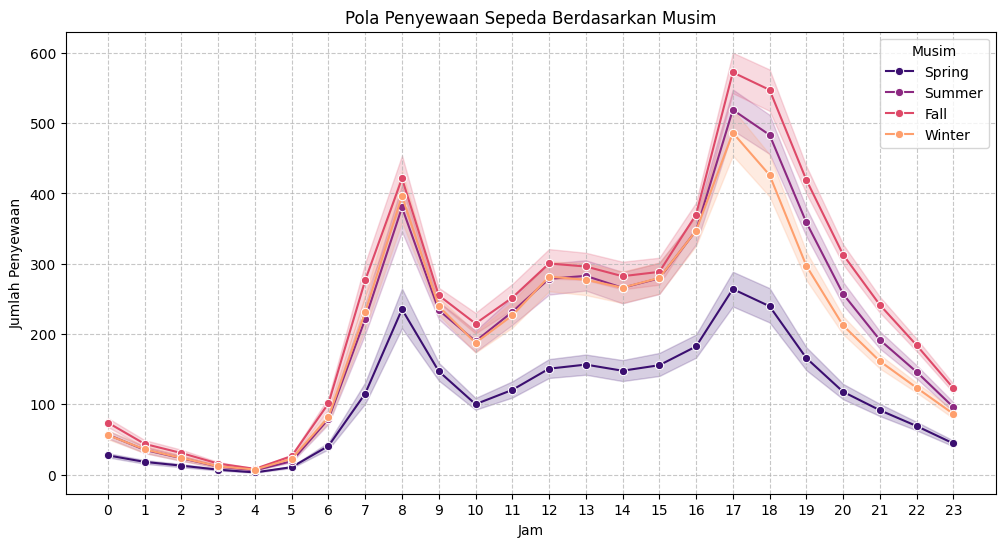

In [23]:
# Pola penyewaan sepeda berdasarkan musim
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hour', y='cnt', hue='season', palette='magma', marker='o')

plt.title('Pola Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Musim')

plt.show()

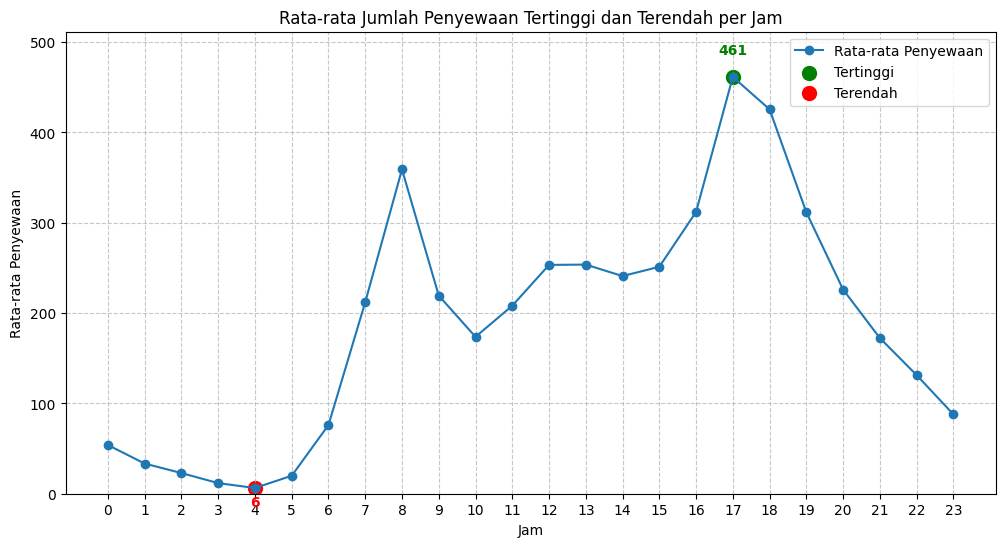

In [24]:
# Menghitung rata-rata penyewaan untuk setiap jam
avg_rentals = hour_df.groupby("hour")["cnt"].mean()

# Menentukan jam dengan rata-rata penyewaan tertinggi dan terendah
highest_hour = avg_rentals.idxmax()
lowest_hour = avg_rentals.idxmin()

# Plot diagram garis
plt.figure(figsize=(12, 6))
plt.plot(avg_rentals.index, avg_rentals.values, linestyle="-", marker="o", label="Rata-rata Penyewaan")

# Menandai titik tertinggi dan terendah
plt.scatter(highest_hour, avg_rentals[highest_hour], color="green", s=100, label="Tertinggi")
plt.scatter(lowest_hour, avg_rentals[lowest_hour], color="red", s=100, label="Terendah")

# Menambahkan teks untuk nilai tertinggi dan terendah
plt.text(highest_hour, avg_rentals[highest_hour] + 25, f"{avg_rentals[highest_hour]:.0f}", 
         ha="center", fontsize=10, color="green", weight="bold")  

plt.text(lowest_hour, avg_rentals[lowest_hour] - 20, f"{avg_rentals[lowest_hour]:.0f}", 
         ha="center", fontsize=10, color="red", weight="bold")

# Menyesuaikan skala sumbu y
plt.ylim(0, avg_rentals.max() + 50)

plt.title("Rata-rata Jumlah Penyewaan Tertinggi dan Terendah per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

**Insight:** 

**1. Tren Penyewaan Sepeda Berdasarkan Bulan**  
- Bulan dengan jumlah penyewa terbanyak dan rata-rata tertinggi adalah Juni, menunjukkan bahwa awal musim panas mungkin menjadi waktu yang paling diminati untuk bersepeda.
- Bulan dengan jumlah penyewa dan rata-rata terendah adalah Januari, yang bisa disebabkan oleh cuaca dingin di musim dingin yang kurang kondusif untuk bersepeda.
- Bulan lain yang juga memiliki tingkat penyewaan tinggi adalah Juli, September, dan Agustus, yang masih termasuk musim panas.

**2. Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda**  
- Sebagian besar penyewa lebih cenderung menggunakan sepeda saat cuaca cerah atau mendung.
- Penyewaan sepeda berkurang drastis ketika ada salju atau hujan ringan, dan bahkan tidak ada penyewaan saat cuaca sangat buruk.
- Hal ini menunjukkan bahwa faktor cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda.

**3. Perbedaan Penyewaan Sepeda pada Hari Libur vs Hari Biasa**  
- Penyewaan sepeda jauh lebih tinggi pada hari kerja dibandingkan hari libur.
- Ini menunjukkan bahwa banyak pengguna sepeda mungkin menggunakannya untuk aktivitas sehari-hari seperti bekerja atau sekolah, bukan sekadar rekreasi.

**4. Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu**  
- Jumat memiliki rata-rata penyewaan tertinggi, diikuti oleh Kamis dan Sabtu.
- Minggu memiliki rata-rata penyewaan terendah, yang bisa menunjukkan bahwa sebagian besar pengguna lebih aktif di hari kerja dan Sabtu.
- Tren ini bisa mengindikasikan bahwa banyak orang menggunakan sepeda sebagai alat transportasi untuk bekerja, terutama menjelang akhir pekan.

**5. Preferensi Penyewaan Berdasarkan Musim**  
- Musim gugur (Fall) memiliki rata-rata penyewaan tertinggi untuk pengguna casual maupun registered, menunjukkan bahwa suhu yang lebih nyaman di musim ini mungkin mendorong lebih banyak orang untuk bersepeda.
- Sebaliknya, musim semi (Spring) memiliki rata-rata penyewaan terendah, kemungkinan karena kondisi cuaca yang kurang stabil.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap permintaan penyewaan sepeda?

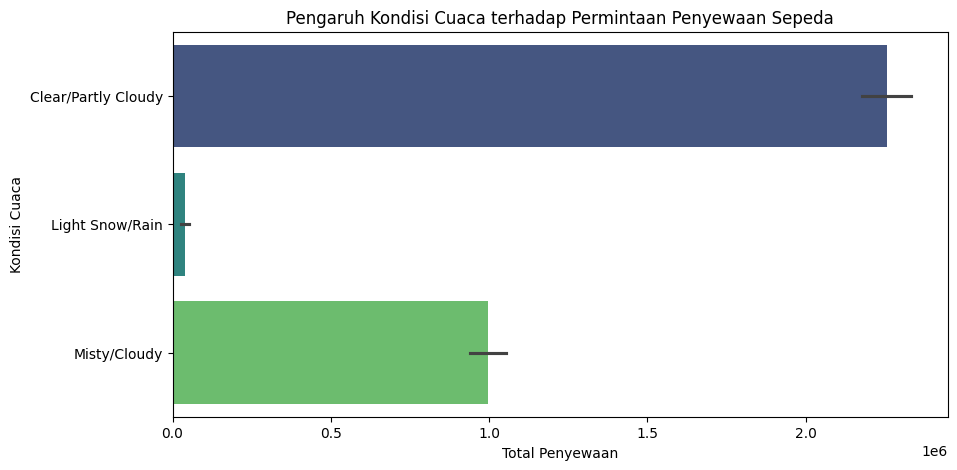

In [25]:
# Bagaimana pengaruh kondisi cuaca terhadap permintaan penyewaan sepeda?
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y='weather_situation', x='count', hue='weather_situation', data=day_df, estimator=sum, palette='viridis')
ax.set_title('Pengaruh Kondisi Cuaca terhadap Permintaan Penyewaan Sepeda')
ax.set_ylabel('Kondisi Cuaca')
ax.set_xlabel('Total Penyewaan')
plt.show()

### Pertanyaan 2: Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah?

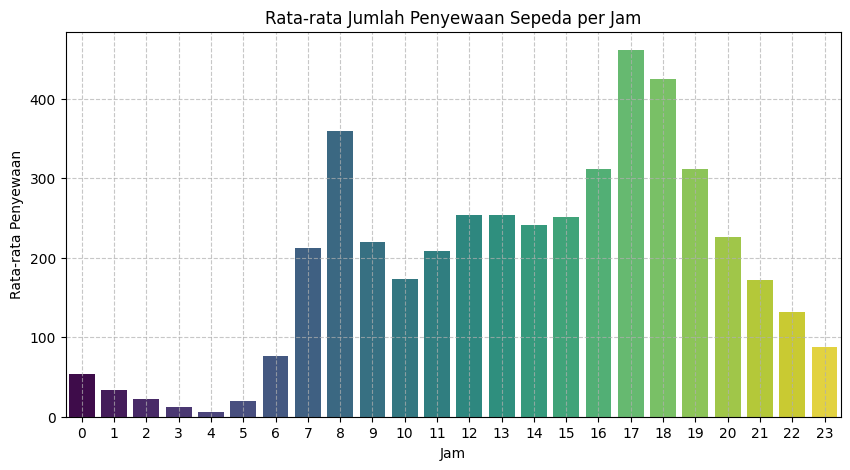

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rentals.index, y=avg_rentals.values, hue=avg_rentals.index, palette='viridis', legend=False)
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3: Apakah terdapat tren tahunan dalam penyewaan sepeda antara tahun 2011 dan 2012?

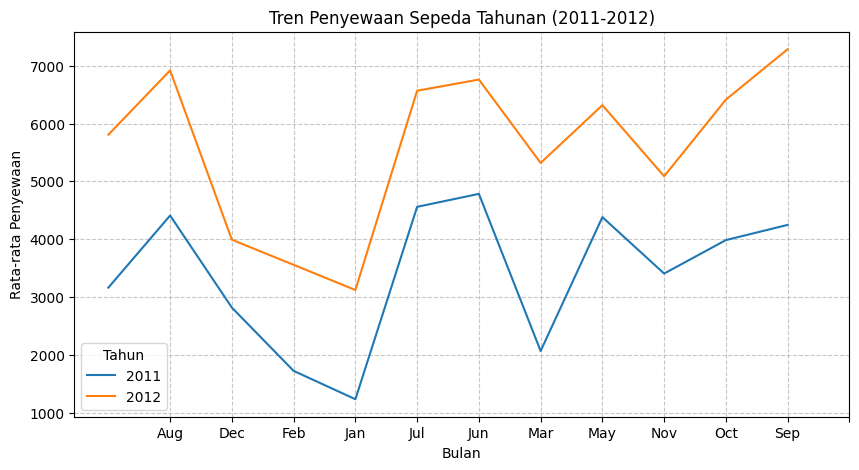

In [27]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_df, x='month', y='count', hue='year', estimator='mean', errorbar=None)
plt.title('Tren Penyewaan Sepeda Tahunan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tahun')
plt.show()

## Conclusion

- Pertanyaan 1 : kondisi cuaca memiliki pengaruh signifikan terhadap permintaan penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca cerah atau berawan ringan (Clear/Partly Cloudy), menunjukkan bahwa pengguna lebih cenderung menyewa sepeda dalam kondisi yang mendukung. Sementara itu, penyewaan menurun pada cuaca berkabut atau berawan (Misty/Cloudy) dan mencapai titik terendah saat hujan ringan atau salju ringan (Light Snow/Rain), yang mengindikasikan bahwa kondisi cuaca buruk mengurangi minat masyarakat untuk menggunakan sepeda. Secara keseluruhan, semakin baik kondisi cuaca, semakin tinggi jumlah penyewaan sepeda.

- Pertanyaan 2 : jumlah penyewaan sepeda tertinggi terjadi pada pukul 17:00, kemungkinan karena banyak orang pulang kerja atau beraktivitas di sore hari. Sementara itu, jumlah penyewaan terendah terjadi pada pukul 3:00, saat sebagian besar orang sedang beristirahat atau tidur.

- Pertanyaan 3 : terlihat bahwa jumlah penyewaan sepeda pada tahun 2012 cenderung lebih tinggi dibandingkan tahun 2011 di hampir setiap bulan. Tren pada kedua tahun menunjukkan pola fluktuatif dengan peningkatan signifikan selama bulan-bulan tertentu, terutama pertengahan tahun. Penurunan penyewaan terlihat pada awal tahun dan akhir tahun, yang kemungkinan disebabkan oleh faktor musiman seperti cuaca dingin atau liburan. Hal ini menunjukkan adanya peningkatan minat terhadap penyewaan sepeda dari tahun ke tahun.

In [28]:
# clean data day to csv
day_df.to_csv('dashboard/day.csv', index=False)
hour_df.to_csv('dashboard/hour.csv', index=False)